# Proyecto de consolidación 1 Daniel Herraiz


#### 1 Descarga de Datos
*Obtener los dataset de manera programática usando la info de la web</p>*

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

In [3]:
import pandas as pd

#### 2 Combinar los datos
*Consultando la documentación, el dataframe que nos vale es* `wine_quality.data.original`

*Comprobamos que es así, y además ya están unidos los dos dataset en uno (red y white)*

In [4]:
df_wine = wine_quality.data.original
print(df_wine['color'].value_counts())
df_wine.head()


color
white    4898
red      1599
Name: count, dtype: int64


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


*Obtenemos la información del dataframe*

In [5]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df_wine.dtypes.value_counts()

float64    11
int64       1
object      1
Name: count, dtype: int64

*Tiene 6497 registros, 13 variables de las cuales 11 son decimales, 1 entero y 1 object (texto)*


### 3 Filtrar Atípicos y manejar datos ausentes

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

*Para detectar los atípicos, se me ocurren una opción visual y una numérica; pintar boxplots y calcular + filtrar por Z-score*

*Primero descarto la columna de color en los cálculos porque no tiene sentido en cuanto a atípicos*

In [9]:
df_wine_nocolor = df_wine.drop(columns=['color'])

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Pinto los box plots. A primera vista, aparecen bastantes datos atípicos*

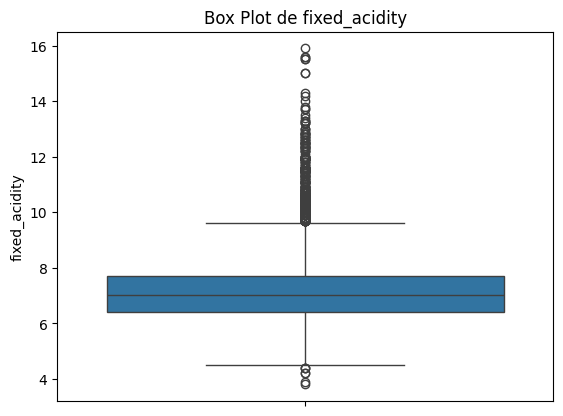

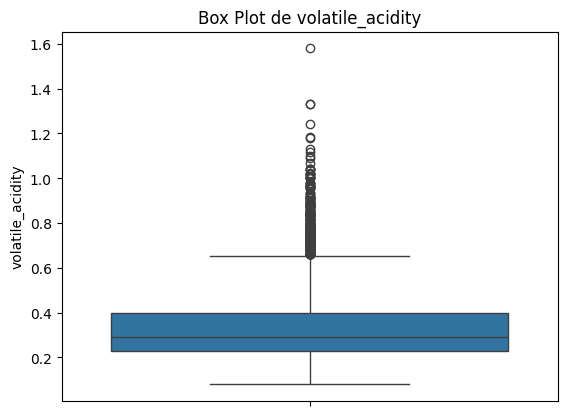

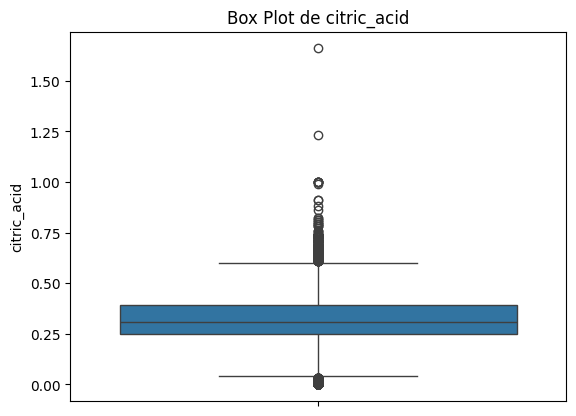

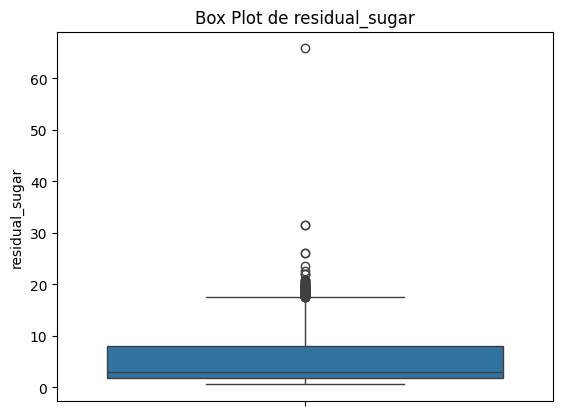

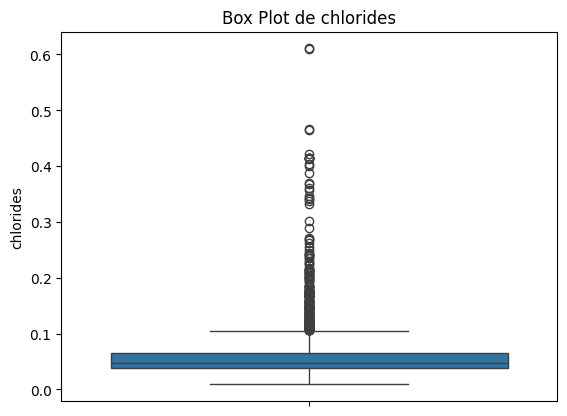

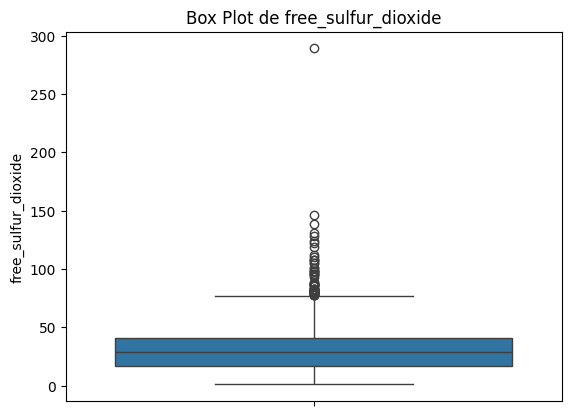

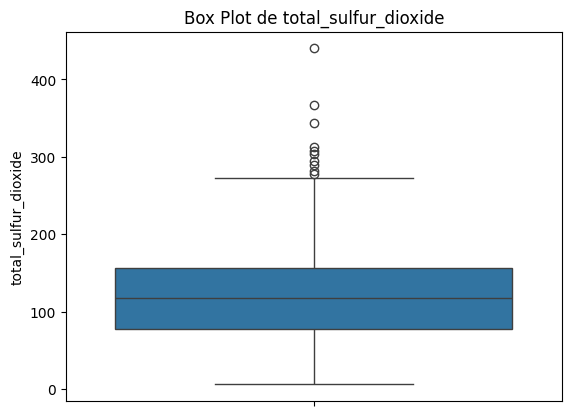

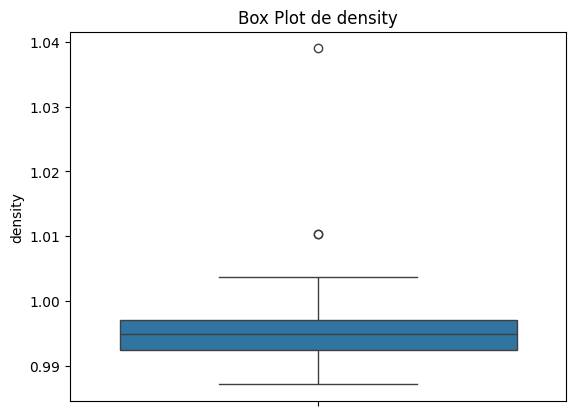

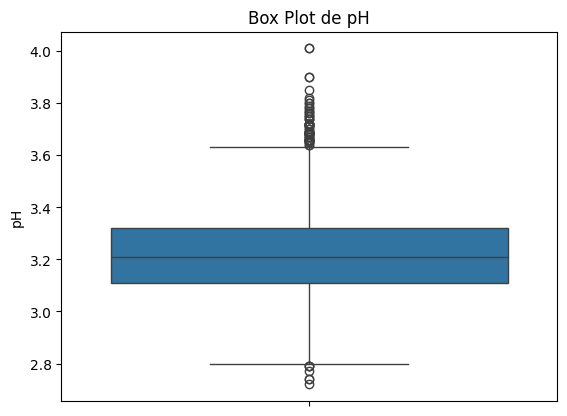

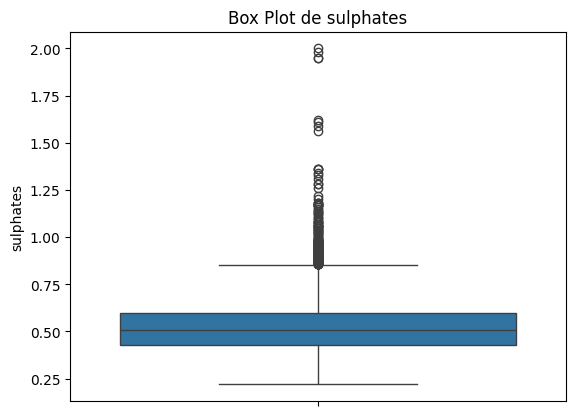

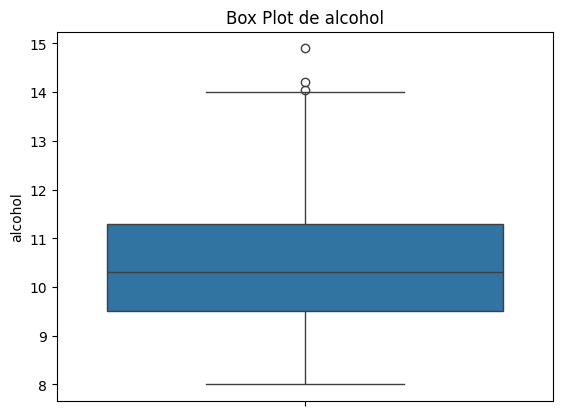

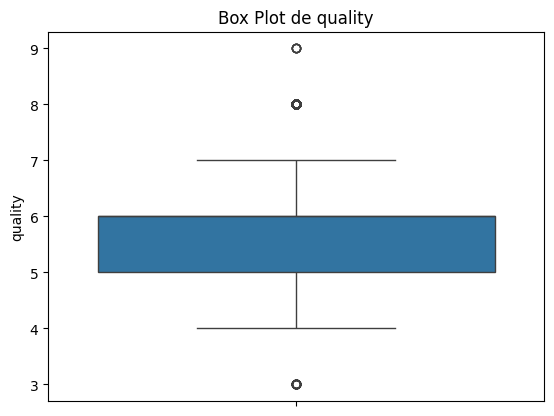

In [11]:
for column in df_wine_nocolor.columns: 
    sns.boxplot(y=df_wine_nocolor[column])  
    plt.title(f'Box Plot de {column}')
    plt.show()

*Calculando los Zscore, estableciendo un criterio de zscore para considerarlos atípicos, y mostrando los resultados podemos tener una lista de todos los registros con datos atípicos.*

*Creo una función y una tabla para realizar la prueba con distintos umbrales*

In [12]:
def detect_outliers(df, threshold):
    z_scores = np.abs((df - df.mean()) / df.std())
    outliers = (z_scores > threshold).any(axis=1)
    total_outliers = outliers.sum()
    return total_outliers

In [13]:
thresholds = [3, 4, 5, 6, 7]
outliers_data = []

for t in thresholds:
    total_outliers = detect_outliers(df_wine_nocolor, t)
    outliers_data.append({'Threshold': t, 'Total Outliers': total_outliers})

outliers_df = pd.DataFrame(outliers_data)
print(outliers_df)

   Threshold  Total Outliers
0          3             508
1          4             188
2          5              77
3          6              49
4          7              31


*Una opción que he visto útil nos permitiría sacar una lista ordenada de los valores más atípicos identificando la fila y columna*

*Obteniendo los 10 valores con zscore más alto, son fáciles de identificar con los boxplot pintados antes*

In [16]:
z_scores = np.abs((df_wine_nocolor - df_wine_nocolor.mean()) / df_wine_nocolor.std())
z_scores_melted = z_scores.reset_index().melt(id_vars='index', var_name='column', value_name='z_score')
top_outliers = z_scores_melted.sort_values(by='z_score', ascending=False).head(10)

print("Top 10 atípicos basado en zscores:")
print(top_outliers)

Top 10 atípicos basado en zscores:
       index               column    z_score
26246    258            chlorides  15.840967
26139    151            chlorides  15.812423
49859   4380              density  14.767654
38829   6344  free_sulfur_dioxide  14.562446
23871   4380       residual_sugar  12.685846
26094    106            chlorides  11.730628
26069     81            chlorides  11.644996
26680    692            chlorides  10.446147
27358   1370            chlorides  10.246338
27360   1372            chlorides  10.246338


*Limpieza de datos*

In [15]:
print(f"Total de filas originales: {len(df_wine)}")
df_wine_clean=df_wine.dropna()
print(f"Total de filas tras limpiar vacíos: {len(df_wine_clean)}")

Total de filas originales: 6497
Total de filas tras limpiar vacíos: 6497


In [110]:
print(f"Total de filas originales: {len(df_wine)}")

z_scores = np.abs((df_wine_nocolor - df_wine_nocolor.mean()) / df_wine_nocolor.std())
outliers = (z_scores > 3).any(axis=1)
df_wine_clean = df_wine[~outliers]

print(f"Total de filas después de eliminar outliers: {len(df_wine_clean)}")

Total de filas originales: 6497
Total de filas después de eliminar outliers: 5989


*Tras realizar la limpieza vemos que:*

-*No existen registros vacíos*

-*Se eliminan 508 registros atípicos considerando un zscore de 3 como umbral*

### 4 Almacenar los datos limpios en SQLite

*Creo una base de datos en el mismo directorio y cargo el dataframe limpio*

In [112]:
import sqlite3

conn = sqlite3.connect('mi_base_de_datos.db')
df_wine_clean.to_sql('datos_limpios', conn, if_exists='replace', index=False)
conn.close()


### 7 Análisis de calidad de los vinos



*Primero separo en blanco y tinto para realizar el análisis independiente, y empiezo el análisis por el blanco*

In [118]:
# Filtrar los vinos blancos
df_white = df_wine_clean[df_wine_clean['color'] == 'white'].drop(columns=['color'])


# Filtrar los vinos tintos
df_red = df_wine_clean[df_wine_clean['color'] == 'red'].drop(columns=['color'])


*Calculo la correlación de las características químicas con la calidad*

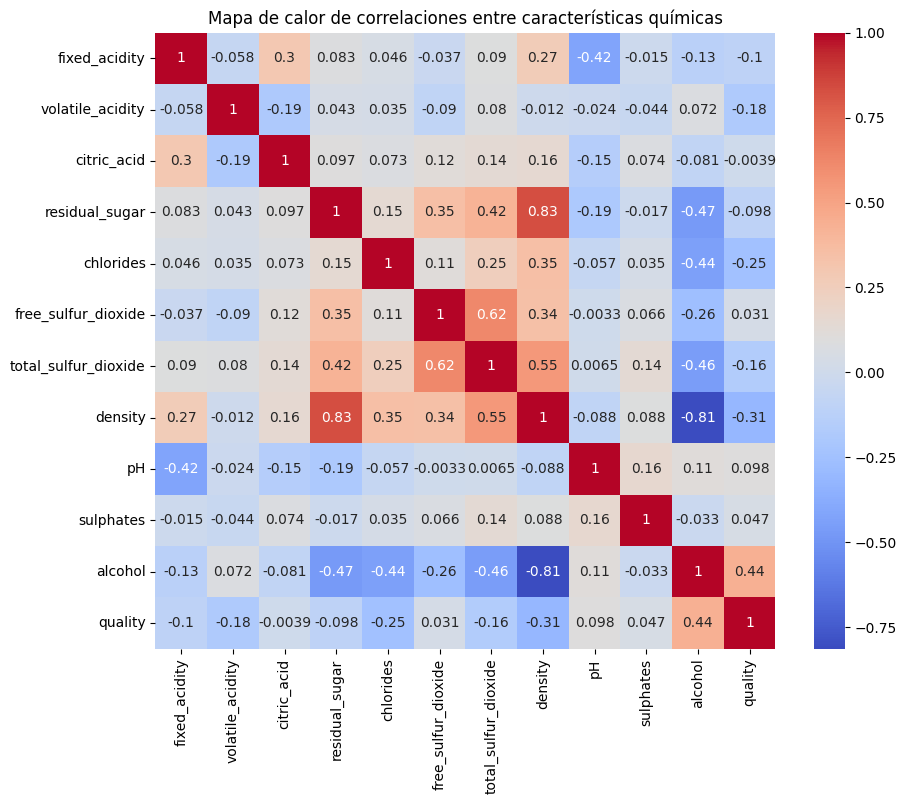

In [119]:
# Correlación de las características químicas con la calidad
correlation = df_white.corr()

# Heatmap de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones entre características químicas')
plt.show()

In [140]:
print(correlation['quality'])

fixed_acidity          -0.102947
volatile_acidity       -0.181945
citric_acid            -0.003863
residual_sugar         -0.098298
chlorides              -0.249827
free_sulfur_dioxide     0.031124
total_sulfur_dioxide   -0.162325
density                -0.314712
pH                      0.098487
sulphates               0.047435
alcohol                 0.440406
quality                 1.000000
Name: quality, dtype: float64


*Según ésto, se pueden hacer algunas interpretaciones sobre la calidad del vino blanco como:*

-*valores de chlorides y density altos son los que más impactan negativamente a la calidad*

-*los valores altos de alcohol tienen gran impacto positivo en la calidad, otros valores que impactan menos son el pH o el azúcar residual*

-*Podemos mirar los valores de los vinos con más y menos calidad para contrastar la correlación*

In [135]:
print("Vinos blancos con menor calidad:")
df_white.sort_values(by='quality').head()


Vinos blancos con menor calidad:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
6438,5.2,0.405,0.15,1.45,0.038,10.0,44.0,0.99125,3.52,0.40,11.6,4
1645,6.2,0.450,0.26,4.40,0.063,63.0,206.0,0.99400,3.27,0.52,9.8,4
6403,6.0,0.350,0.46,0.90,0.033,9.0,65.0,0.98934,3.24,0.35,12.1,4
6378,6.0,0.590,0.00,0.80,0.037,30.0,95.0,0.99032,3.10,0.40,10.9,4
3248,6.9,0.260,0.49,1.60,0.058,39.0,166.0,0.99650,3.65,0.52,9.4,4


In [136]:
print("Vinos blancos con mayor calidad:")
df_white.sort_values(by='quality', ascending=False).head()

Vinos blancos con mayor calidad:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4542,7.0,0.12,0.29,10.3,0.039,41.0,98.0,0.99564,3.19,0.38,9.8,8
4544,4.9,0.33,0.31,1.2,0.016,39.0,150.0,0.98713,3.33,0.59,14.0,8
1879,7.0,0.24,0.36,2.8,0.034,22.0,112.0,0.99000,3.19,0.38,12.6,8
6385,4.4,0.32,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8
4862,6.5,0.26,0.31,3.6,0.030,36.0,92.0,0.99026,3.22,0.62,12.6,8


In [141]:
print(df_red.corr()['quality'])

fixed_acidity           0.130438
volatile_acidity       -0.361826
citric_acid             0.219367
residual_sugar          0.014277
chlorides              -0.190548
free_sulfur_dioxide    -0.048687
total_sulfur_dioxide   -0.227729
density                -0.249283
pH                     -0.048430
sulphates               0.406453
alcohol                 0.528849
quality                 1.000000
Name: quality, dtype: float64


*Según ésto, se pueden hacer algunas interpretaciones sobre la calidad del vino tinto como:*

-*volatile_acidity es la variable que más impacta negativamente, seguida de densidad y total_sulfur_dioxide*

-*los valores altos de alcohol tienen gran impacto positivo en la calidad, seguido de sulfatos y ácido cítrico*

-*Podemos mirar los valores de los vinos con más y menos calidad para contrastar la correlación*

In [142]:
print("Vinos tintos con menor calidad:")
df_red.sort_values(by='quality').head()

Vinos tintos con menor calidad:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
830,7.5,0.685,0.07,2.5,0.058,5.0,9.0,0.99632,3.38,0.55,10.9,4
872,7.3,0.350,0.24,2.0,0.067,28.0,48.0,0.99576,3.43,0.54,10.0,4
876,7.1,0.470,0.00,2.2,0.067,7.0,14.0,0.99517,3.40,0.58,10.9,4
703,7.5,0.380,0.48,2.6,0.073,22.0,84.0,0.99720,3.32,0.70,9.6,4
704,9.1,0.765,0.04,1.6,0.078,4.0,14.0,0.99800,3.29,0.54,9.7,4


In [143]:
print("Vinos tintos con mayor calidad:")
df_red.sort_values(by='quality', ascending=False).head()

Vinos tintos con mayor calidad:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.4,8
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
1202,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
